# Equation2.1:
$$
\begin{aligned}
\frac{\partial a}{\partial t}&= s(\frac{a^2}{b} + b_a) - r_aa + D_a\Delta a \\
\frac{\partial b}{\partial t}&= sa^2 - r_bb + b_b + D_b\Delta b \\
\end{aligned}
$$

Meinhardt, H. The Algorithmic Beauty of Sea Shells; Springer Science & Business Media: Berlin/Heidelberg Germany, 2009. Page 23.

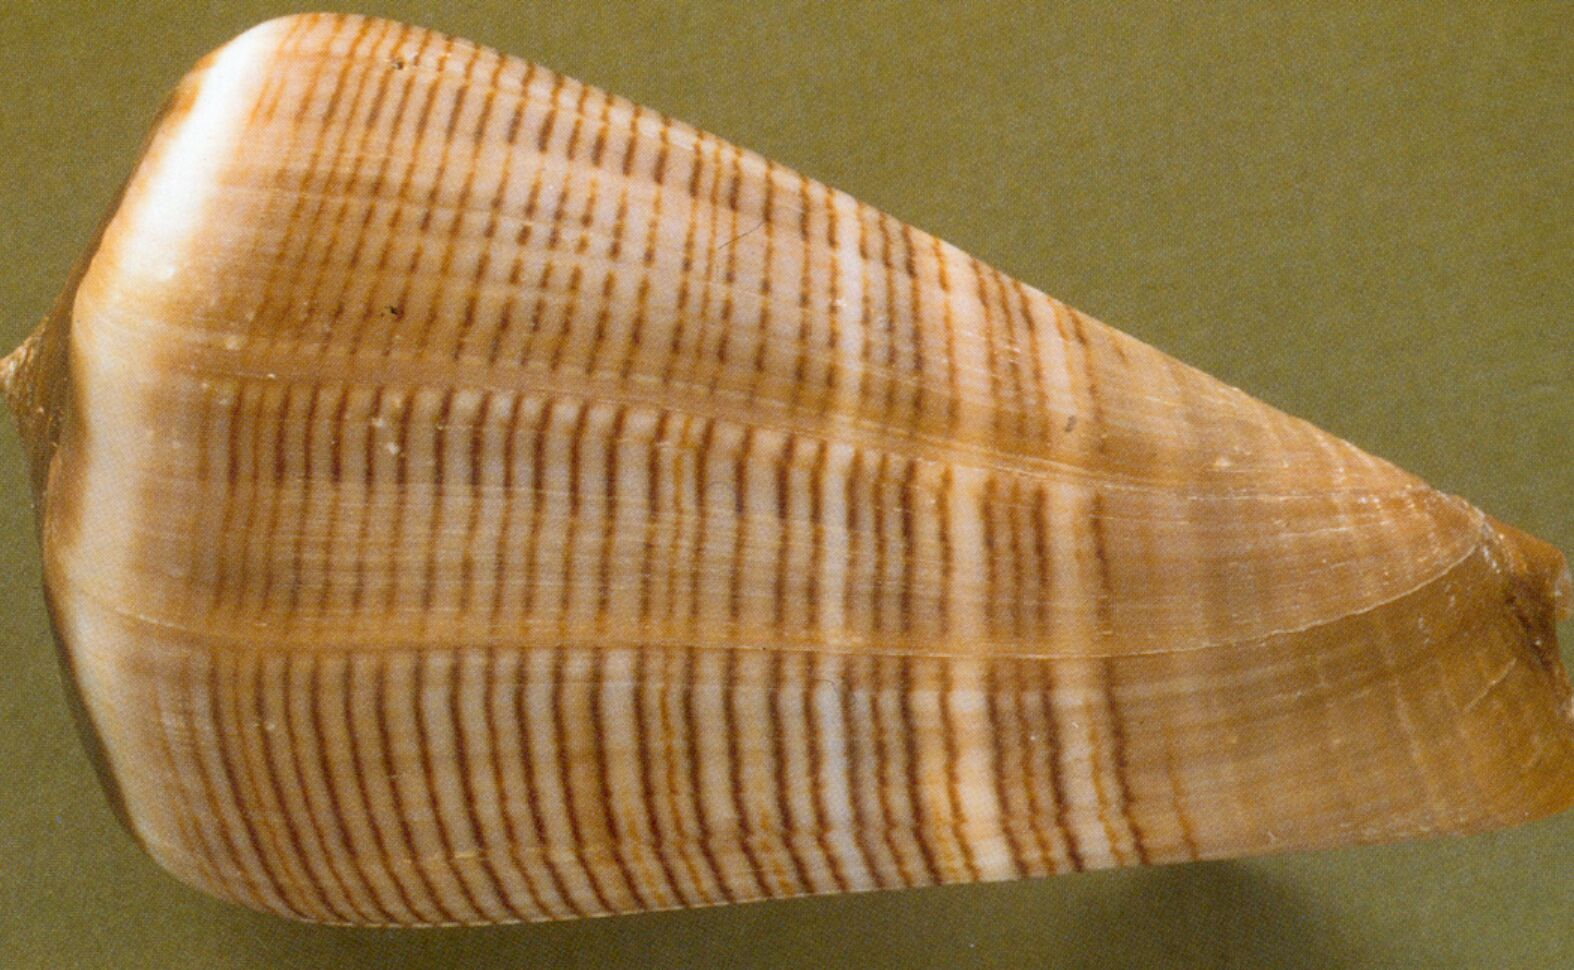

Click here for more details. http://oliva.porphyria.free.fr

Below we implement this model in iPython.

Created on Sat Mar 30 13:50:12 2019

In [1]:
# Clear all existing variables
for name in dir(): 
    if not name.startswith('_'): 
        del globals()[name]
on=1; off=0 
Periodic=on

In [2]:
#packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from numpy import random

In [3]:
#parameter
#a
Da =0.01
ra =0.05
ba =0.05
#b
Db =0.4
rb =0.08
bb =0
s  =ra*(0.95+0.1*random.random())

In [4]:
#grid
LX =128.0
m  =128
dx =LX/m

LT =6  #lengthe of iteration 
dt =0.1
NP =128 #number of plot

In [5]:
#initial value
a     =random.random(m)
b     =random.random(m)
Ma    =np.zeros((NP,m))
Mb    =np.zeros((NP,m))

In [6]:
#diffuse
def d2_dx2(Z): 
    Zleft = np.roll(Z, 1, axis=0)
    Zright = np.roll(Z, -1, axis=0)
    return (Zleft + Zright   - 2.0 * Z) / dx**2

In [7]:
#simulation
for j in range(int(NP)):
    for i in range(int(LT)):
        a, b = \
        a + dt*( s*(a*a/b + ba) - ra*a + Da*d2_dx2(a) ),\
        b + dt*( s*a*a - rb*b + Db*d2_dx2(b) + bb )
    Ma[j,:] = a
    Mb[j,:] = b

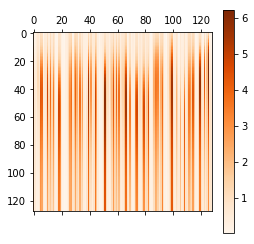

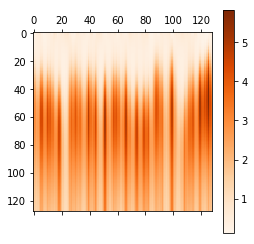

In [8]:
#plot a
plt.matshow(Ma, cmap='Oranges')
plt.colorbar()
plt.savefig('2.1.the activator-inhibitor system-a.png', dpi=350)
#plot b
plt.matshow(Mb, cmap='Oranges')
plt.colorbar()
plt.savefig('2.1.the activator-inhibitor system-b.png', dpi=350)

© Kang, ECNU-China 2020